In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [10]:
def plot_f(f,i0,i1):
    x=np.arange(i0,i1,0.1)
    y=f(x)
    plt.plot(x,y)
def plot_df(f,df,w):
    y=f(w)
    m=df(w)
    c=y-m*w
    plt.plot(w,y,"*")
    x=np.arange(w-1,w+1,0.1)
    y=m*x+c
    plt.plot(x,y)

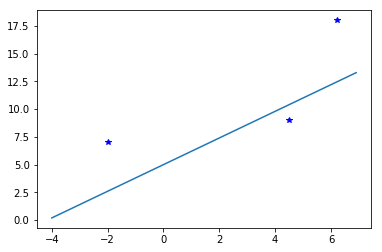

El error es= 52.23360000000001


In [11]:
# Linear model
def f(x):
    y=1.2*x+5
    return y
plot_f(f,-4,7)
Dx = [-2,4.5, 6.2]
Dy = [ 7,9  ,18  ]
# Plot the points using matplotlib
plt.plot(Dx,Dy,"*",color="blue")
plt.show()  # You must call plt.show() to make graphics appear.
L=(7-f(-2))**2+(9-f(4.5))**2+(18-(f(6.2)))**2
print("El error es=",L)

6 36 12
1.9660800000000003 3.865470566400001 3.9321600000000005


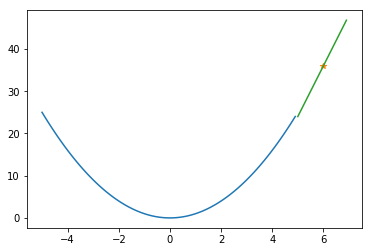

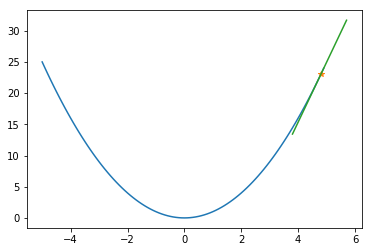

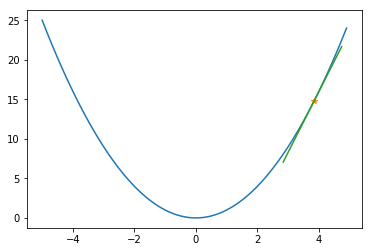

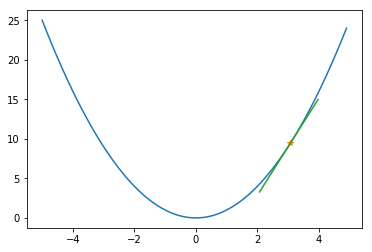

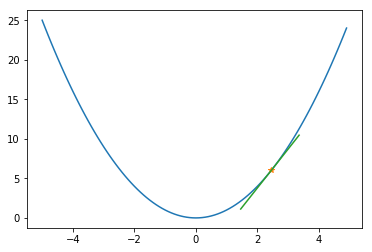

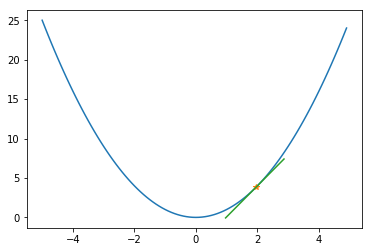

In [5]:
#Gradient descent intuition
#Find w that make loss function L(w) as lower as posible
#updating w step by step 
#with the help of the slope dL(w) and learning rate a
def L(w):
    y=w**2
    return y
def dL(w):
    dy=2*w
    return dy
plot_f(L,-5,5)
#Learning rate
#You can play changing this value
a=0.1
#Initial weight
#you can play changing this value
w=6
#if you change a=1 and w=3 the system oscilate. Try it!!
plot_df(L,dL,w)
#Initial weight, cost value, slope
print(w,L(w),dL(w))
#GD 5 Steps
for i in range(5):
    plt.figure()
    plot_f(L,-5,5)
    #weight increment
    iw=-dL(w)
    #weight update
    w=w+a*iw
    plot_df(L,dL,w)
#Final weight, cost value, slope
print(w,L(w),dL(w))

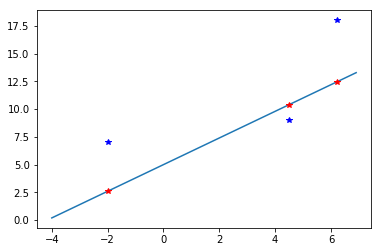

[[  2.6   10.4   12.44]]
[[ 4.4  -1.4   5.56]]
52.2336


In [4]:
#Matrix version of linear model
def plots():
    #plotting, don't pay attention on this.
    plt.figure()
    plot_f(lambda x:w[0,1]*x+w[0,0],-4,7)
    plt.plot(x[1],fm(x),"*",color="red")
    plt.plot(x[1],y,"*",color="blue")
    plt.show()
#Matrix version of linear model
def fm(x):
    y=w*x
    return y
#Initial weights
w=np.matrix([5.0,1.2])
#Data, first row are ones for bias
x=np.matrix([[ 1.0, 1.0, 1.0],
             [-2.0, 4.5, 6.2]])
y=np.matrix( [ 7.0, 9.0,18.0])
#plotting
plots()
#Loss function
dif=y-fm(x)
L=dif*dif.T
print(fm(x))
print(dif)
#this value is equal to the not matrix version above
print(L[0,0])

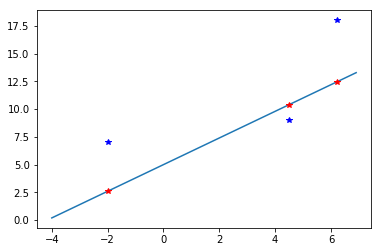

w    = [[ 5.   1.2]]
L(w) = 52.2336
dL(w)= [[-17.12  -38.744]]


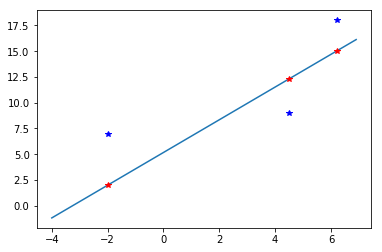

w    = [[ 5.1712   1.58744]]
L(w) = 44.9441266804
dL(w)= [[ -9.351344   12.8121072]]


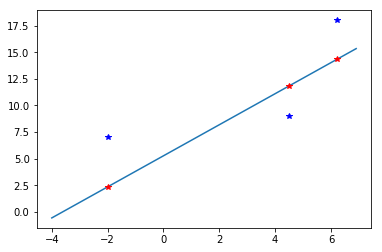

w    = [[ 5.26471344  1.45931893]]
L(w) = 43.2749705016
dL(w)= [[-11.01957001  -1.62457895]]


In [7]:
xl=[]
yl=[]
zl=[]
def saveToPlot3D(w,l):
    xl.append(w[0,0])
    yl.append(w[0,1])
    zl.append(l)
#Matrix version of Gradient descent
#Loss function
def L(w):
    dif=y-fm(x)
    l=dif*dif.T
    return l[0,0]
#Loss gradient is a vector with same dimensions as w
def dL(w):
    dif=y-fm(x)
    #print(dif)
    dL_w=-2*dif*x.T
    return dL_w
#Learning rate
a=0.01
#Initial weights
w=np.matrix([5.0,1.2])
for i in range(3):
    if i%1==0:
        #plotting
        plots()
        print("w    =",w)
        print("L(w) =",L(w))
        print("dL(w)=",dL(w))
        saveToPlot3D(w,L(w))
    iw=-dL(w)
    w=w+a*iw

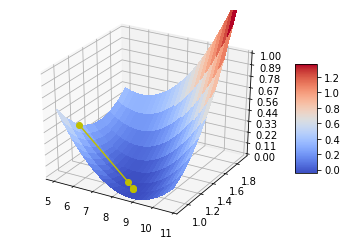

In [11]:
'''
3Dd visualization of the 2D loss surface
Axis x is w0 and y is w1
If we drop a ball on this surface the final point (x,y) is the final values of w
'''
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
w0 = np.arange(5, 11,0.25)
w1 = np.arange(0.9, 2, 0.125)
X, Y = np.meshgrid(w0, w1)
Z=np.zeros_like(X)
for i in range(w0.shape[0]):
    for j in range(w1.shape[0]):
        w[0,0]=w0[i]
        w[0,1]=w1[j]
        Z[j,i]=(L(w)-30)/60
        #print("w=",w,"Z[j,i]=",Z[j,i])

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Scatter gradient points
#scatter=ax.scatter(np.array(xl),np.array(yl),(np.array(zl)-30)/60,c="y", marker="o")
ax.plot(np.array(xl),np.array(yl),(np.array(zl)-30)/60,c="y", marker="o")

# Customize the z axis.
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [12]:
#Binary Linear Classification
#Let apply the above to a real problem
#handwritten digit recognition
#
#Firstly start collecting the data
import pickle, gzip, numpy

# Load the dataset
# There is a train set, a validation seet and a test set.
# -Train set is to train the models
# -Validation set is to validate models
# -Test set is to test the final model
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f,encoding='iso-8859-1')
f.close()

print(train_set[0].shape)
print(train_set[1].shape)

(50000, 784)
(50000,)


7


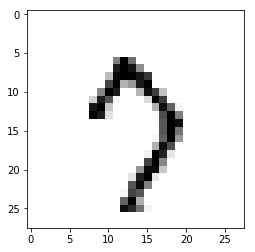

In [14]:
plt.imshow(train_set[0][30202].reshape(28,28), cmap="gray_r")
print(train_set[1][30202])
plt.show()

In [14]:
#this function add a row of ones to the first row of a matrix
#in order to have a bias term
def addOnesFirstRow(m):
    ones=np.ones(m.shape[1])
    rm=np.vstack([ones,m])
    return rm

In [13]:
N=1000 #data samples
print("Trainning with",N,"data samples.")
D=train_set[0][0].shape[0]
print("Each sample as a dimension of",D,".")
#We are going to recognize digits zero and one
train_zeros_ones_x=np.matrix([train_set[0][i] for i in range(train_set[0].shape[0]) if train_set[1][i]==0 or train_set[1][i]==1][:N]).T
train_zeros_ones_x=addOnesFirstRow(train_zeros_ones_x)
train_zeros_ones_y=np.matrix([train_set[1][i] for i in range(train_set[0].shape[0]) if train_set[1][i]==0 or train_set[1][i]==1][:N])

valid_zeros_x=np.matrix([valid_set[0][i] for i in range(valid_set[0].shape[0]) if valid_set[1][i]==0][:N]).T
valid_zeros_x=addOnesFirstRow(valid_zeros_x)
valid_ones_x =np.matrix([valid_set[0][i] for i in range(valid_set[0].shape[0]) if valid_set[1][i]==1][:N]).T
valid_ones_x=addOnesFirstRow(valid_ones_x)

Trainning with 1000 data samples.
Each sample as a dimension of 784 .


In [16]:
print(train_zeros_ones_x.shape)
print(train_zeros_ones_y.shape)
print(valid_zeros_x.shape)
print(valid_ones_x.shape)

(785, 1000)
(1, 1000)
(785, 991)
(785, 1000)


In [17]:
# x images and y labels
x=train_zeros_ones_x
y=train_zeros_ones_y
print(w.shape)
print(x.shape)
print(y.shape)

(1, 2)
(785, 1000)
(1, 1000)


In [13]:
#Learning rate
a=0.01

#Init weights random normal with 1/sqrt(D) variance, data dimension + 1 for bias
w=np.matrix(np.random.normal(0,1.0/np.sqrt(D),D+1))
#Init the bias to 0 not random
w[0,0]=0
print(w.shape)

#Binary Lineal Classification model
def Lin(w,x):
    return w*x
def dLin_w(w,x):
    return x.T
def Sigmoid(l):
    return 1.0/(1.0+np.exp(-l))
def dSigmoid(l):
    s=Sigmoid(l)
    return s*(1.0-s)
#Function is linear but shrinked to [0,1]
def f(w,x):
    l=Lin(w,x)
    return Sigmoid(l)
def df(w,x):
    return dSigmoid(Lin(w,x))*dLin_w(w,x)
#Loss is binary cross entropy
def L(w,x,y):
    fwx=f(w,x)
    cross1=np.multiply(y,np.log(fwx))
    cross0=np.multiply((1.0-y),np.log(1-fwx))
    l=-np.sum(cross1+cross0)/N
    return l
#Gradient has almost the same expresion as in less square loss
def dL(w,x,y):
    dif=f(w,x)-y
    return dif*x.T/N

#Learning as always
i=0
while i<1000:
    iw=-dL(w,x,y)
    w=w+a*iw
    if i%100==0:
        print("L(w,x,y)=",L(w,x,y),"iw=",np.min(iw),np.max(iw))
    i+=1
print("L(w,x,y)=",L(w,x,y),"iw=",np.min(iw),np.max(iw))


(1, 785)
L(w,x,y)= 0.673590529504
L(w,x,y)= 0.645030981449 iw= -0.142518535067 0.271164647984
L(w,x,y)= 0.114684566413 iw= -0.0223393265733 0.0600985769957
L(w,x,y)= 0.0673810023658 iw= -0.0129098075361 0.0339496098394
L(w,x,y)= 0.0497127434786 iw= -0.00927064505242 0.0241548396833
L(w,x,y)= 0.0403099871251 iw= -0.00752048880772 0.0189716226092
L(w,x,y)= 0.0344002247 iw= -0.00639700037492 0.0157391801576
L(w,x,y)= 0.0303052752055 iw= -0.00560843595286 0.0135187110911
L(w,x,y)= 0.0272795227693 iw= -0.00502108537294 0.0118928894155
L(w,x,y)= 0.0249396398578 iw= -0.00456464716906 0.0106473052539
L(w,x,y)= 0.0230676882919 iw= -0.00419846766262 0.00966021213998
L(w,x,y)= 0.0215442827293 iw= -0.00390007817077 0.00886449579281


In [14]:
sample=valid_ones_x
#plt.imshow(sample.reshape(28,28), cmap="gray_r")
#plt.show()
print(sample.shape)
print(np.sum(f(w,sample)>0.5))

(785, 1000)
999


In [15]:
sample=valid_zeros_x
#plt.imshow(sample.reshape(28,28), cmap="gray_r")
#plt.show()
print(sample.shape)
print(np.sum(f(w,sample)<0.5))

(785, 991)
987


-0.147807602713 0.328614582461
(1, 785)
(1, 784)


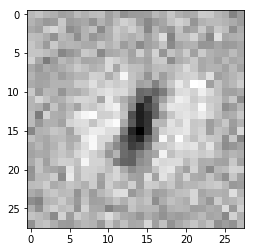

In [16]:
print(np.min(w),np.max(w))
print(w.shape)
imgw=w[:,1:]
print(imgw.shape)
plt.imshow(imgw.reshape(28,28), cmap="gray_r")
plt.show()


(10, 50000)
(50000,)
(785, 50000)
[[ 1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[5 0 4 1 9 2 1 3 1 4]
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


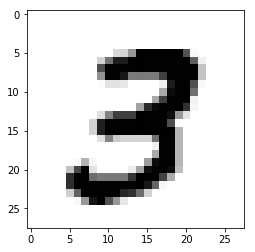

In [15]:
N=train_set[0].shape[0]
D=train_set[0].shape[1]
train_set_x=addOnesFirstRow(np.matrix(train_set[0]).T)
#one hot encoding
train_set_y=np.matrix(np.zeros((10,N)))
train_set_y[train_set[1],np.arange(N)]=1
print(train_set_y.shape)
print(train_set[1].shape)
print(train_set_x.shape)
print(train_set_x[:5,:5])
print(train_set[1][:10])
print(train_set_y[:,:10])
x=train_set_x
y=train_set_y
plt.imshow(train_set_x[1:,7].reshape(28,28),cmap="gray_r")
plt.show()


In [20]:
#Learning rate
a=0.1

#Init weights random normal with 1/sqrt(D) variance, data dimension + 1 for bias
w=np.matrix(np.random.normal(0,1.0/np.sqrt(D),10*(D+1)).reshape(10,D+1))
#Init the bias to 0 not random
w[:,0]=0
print(w.shape)
#print(w[:,:4])

#Binary Lineal Classification model
def Lin(w,x):
    return w*x
def dLin_w(w,x):
    return x.T
def Softmax(l):
    #trick to avoid numerical unstability
    l-=np.max(l,axis=0)
    e=np.exp(l)
    s=np.sum(e,axis=0)
    p=e/s
    return p
#Function is linear but shrinked to [0,1]
def f(w,x):
    l=Lin(w,x)
    return Softmax(l)
#Loss is binary cross entropy
def L(w,x,y):
    fwx=f(w,x)
    cross=np.multiply(y,np.log(fwx))
    l=-np.sum(cross)/N
    return l
#Gradient has almost the same expresion as in less square loss
def dL(w,x,y):
    p=f(w,x)
    dif=p-y
    dl=dif*x.T
    return dl/N

#Learning as always
i=0
while i<100:
    iw=-dL(w,x,y)
    w=w+a*iw
    if i%50==0:
        print("L(w,x,y)=",L(w,x,y),"iw=",np.min(iw),np.max(iw))
    i+=1
print("L(w,x,y)=",L(w,x,y),"iw=",np.min(iw),np.max(iw))

(10, 785)
L(w,x,y)= 2.18126784782 iw= -0.0706023117722 0.0628184277033
L(w,x,y)= 0.807471114865 iw= -0.0151742737453 0.0178710250363
L(w,x,y)= 0.623115251079 iw= -0.00933388883478 0.0106474687827


In [21]:
p=f(w,x)
print(train_set[1][:10])
print((p[:,:10]>0.5)*1)

[5 0 4 1 9 2 1 3 1 4]
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 1 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]


-0.248320971389 0.280583220176
(10, 785)


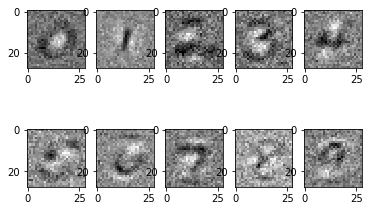

In [22]:
print(np.min(w),np.max(w))
print(w.shape)
for i in range(10):
    plt.subplot(2, 5, i+1)
    imgw=w[i,1:]
    plt.imshow(imgw.reshape(28,28), cmap="gray_r")
plt.show()
